In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df=pd.read_csv(r"C:\Users\91790\OneDrive\Documents\New Data Science Training Classes from 11th July\dataset_diabetes_diabetic_data.csv")
df.head()

,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,change,diabatic
0,8222157,Caucasian,Female,[0-10),6,25,1,1,41,0,1,0,0,0,250.83,?,?,1,No,No
1,55629189,Caucasian,Female,[10-20),1,1,7,3,59,0,18,0,0,0,276,250.01,255,9,Ch,Yes
2,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,5,13,2,0,1,648,250,V27,6,No,Yes
3,82442376,Caucasian,Male,[30-40),1,1,7,2,44,1,16,0,0,0,8,250.43,403,7,Ch,Yes
4,42519267,Caucasian,Male,[40-50),1,1,7,1,51,0,8,0,0,0,197,157,250,5,Ch,Yes


In [59]:
df.shape

(70180, 20)

In [60]:
df.describe()

,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,7.018000e+04,70180.000000,70180.000000,70180.000000,70180.000000,70180.000000,70180.000000,70180.000000,70180.000000,70180.000000,70180.00000,70180.000000
mean,4.589563e+07,2.121730,3.981305,5.926404,4.439370,42.670020,1.350043,15.338772,0.294543,0.156312,0.60513,7.154104
std,3.707033e+07,1.532443,5.657360,4.424962,3.032789,19.197482,1.683676,8.071803,1.052725,0.722395,1.22914,1.992406
min,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,1.000000
25%,1.521589e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.00000,5.000000
50%,3.572850e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,14.000000,0.000000,0.000000,0.00000,8.000000
75%,8.317725e+07,3.000000,5.000000,7.000000,6.000000,56.000000,2.000000,19.000000,0.000000,0.000000,1.00000,9.000000
max,1.893511e+08,8.000000,28.000000,20.000000,14.000000,129.000000,6.000000,81.000000,36.000000,64.000000,21.00000,16.000000


In [61]:
df.columns

Index(['patient_nbr', 'race', 'gender', 'age', 'admission_type_id',
       'discharge_disposition_id', 'admission_source_id', 'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'change', 'diabatic'],
      dtype='object')

#### Here 0 missing values are showing because missing values are in the form of "?"

In [62]:
df.isnull().sum()

patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
change                      0
diabatic                    0
dtype: int64

In [63]:
df.drop(columns="patient_nbr",axis=1,inplace=True)

In [64]:
df.shape

(70180, 19)

In [65]:
df.dtypes

race                        object
gender                      object
age                         object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
change                      object
diabatic                    object
dtype: object

In [66]:
df.nunique()

race                          6
gender                        3
age                          10
admission_type_id             8
discharge_disposition_id     26
admission_source_id          13
time_in_hospital             14
num_lab_procedures          116
num_procedures                7
num_medications              74
number_outpatient            29
number_emergency             19
number_inpatient             21
diag_1                      685
diag_2                      702
diag_3                      727
number_diagnoses             16
change                        2
diabatic                      2
dtype: int64

#### Missing Values

In [67]:
df[df['diag_1']=='?']['diag_1'].count()

19

In [68]:
df[df['diag_2']=='?']['diag_2'].count()

304

In [69]:
df[df['diag_3']=='?']['diag_3'].count()

1237

#### Missing Values count and column detection

In [70]:
cnt=0
for i in df:
    if df[df[i]=="?"][i].count()>0:
        print(i,"column has missing values count :-",df[df[i]=='?'][i].count())
        cnt+=1
cnt

race column has missing values count :- 1461
diag_1 column has missing values count :- 19
diag_2 column has missing values count :- 304
diag_3 column has missing values count :- 1237


4

In [71]:
df.shape

(70180, 19)

In [72]:
df.drop(columns=["diag_1",'diag_2','diag_3'],axis=1,inplace=True)

In [73]:
df.shape

(70180, 16)

In [74]:
Dup_Rows=df[df.duplicated()]

print("\n\nDuplicate Rows : \n {}".format(Dup_Rows))



Duplicate Rows : 
                   race  gender      age  admission_type_id  \
4722   AfricanAmerican  Female  [10-20)                  1   
17298        Caucasian  Female  [20-30)                  3   
18111        Caucasian    Male  [70-80)                  1   
23475        Caucasian    Male   [0-10)                  1   
23932  AfricanAmerican  Female  [50-60)                  1   
34892  AfricanAmerican  Female  [50-60)                  1   
41130        Caucasian  Female  [50-60)                  1   
44590        Caucasian    Male  [70-80)                  1   
54543        Caucasian    Male  [80-90)                  1   
56744  AfricanAmerican    Male  [70-80)                  1   
59066        Caucasian    Male  [70-80)                  1   
61728  AfricanAmerican    Male  [40-50)                  1   
62044        Caucasian    Male  [70-80)                  1   
62366  AfricanAmerican  Female  [50-60)                  2   
62492        Caucasian  Female  [50-60)          

In [75]:
df.drop_duplicates(keep='first',inplace=True)

In [76]:
df.shape

(70158, 16)

#### Correlation

<AxesSubplot:>

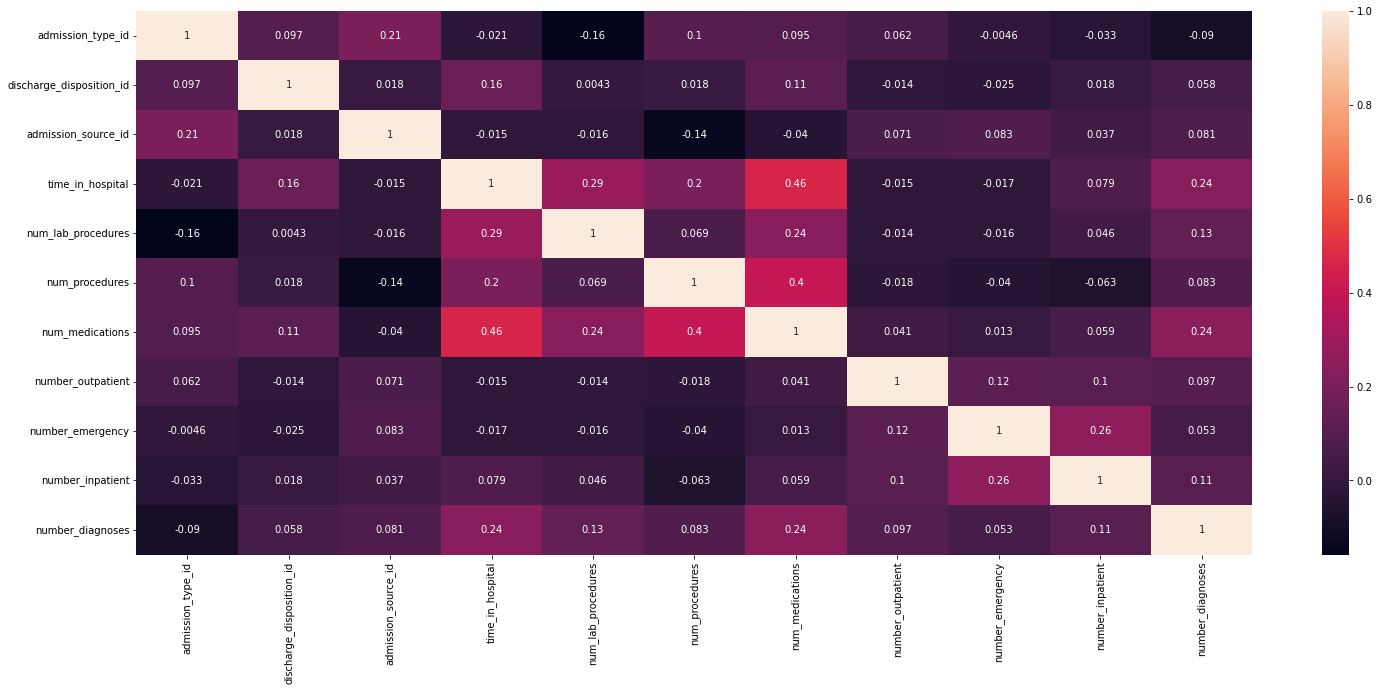

In [77]:
plt.figure(figsize = (25,10))
sns.heatmap(df.corr(),annot = True)

In [78]:
df["race"].replace("?",np.nan,inplace = True)
df.dropna(subset = ["race"],inplace = True)

#### Model Development

In [79]:
from sklearn.metrics import accuracy_score,confusion_matrix,auc
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [80]:
df["race"] = le.fit_transform(df["race"])
df["age"] = le.fit_transform(df["age"])
df["gender"] = le.fit_transform(df["gender"])
df["change"] = le.fit_transform(df["change"])
df["diabatic"] = le.fit_transform(df["diabatic"])

In [81]:
X=df.drop("diabatic",axis=1)
y=df.diabatic

#### Feature Importance

In [82]:
from sklearn.ensemble import ExtraTreesClassifier

In [83]:
et = ExtraTreesClassifier()
et.fit(X,y)

ExtraTreesClassifier()

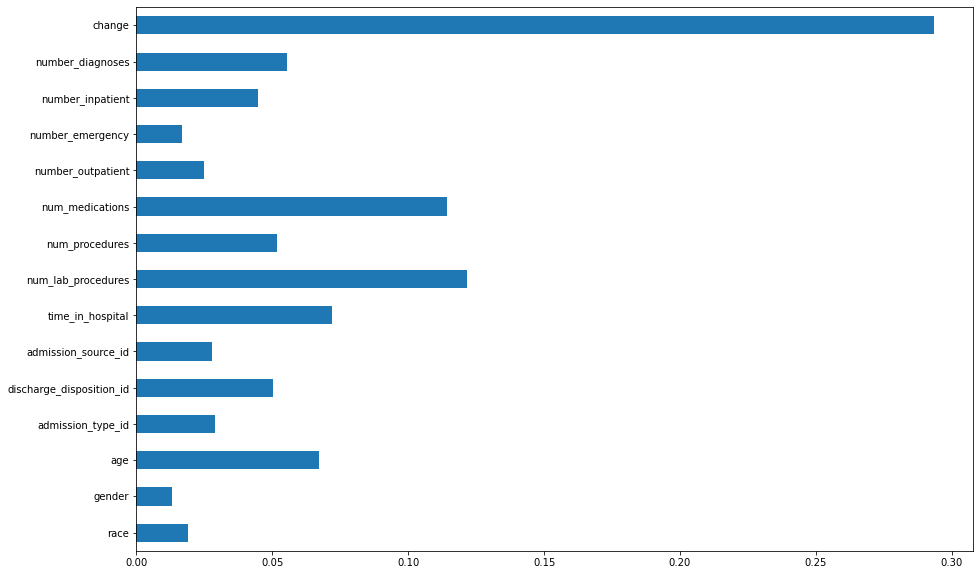

In [84]:
plt.figure(figsize = (15,10))
dd = pd.Series(et.feature_importances_,index=X.columns)
dd.plot(kind = "barh")
plt.show()

#### Decision Tree

In [85]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=10)

In [87]:
DTC= DecisionTreeClassifier()

In [88]:
DTC.fit(X_train,y_train)

DecisionTreeClassifier()

In [89]:
y_pred = DTC.predict(X_test)

In [90]:
accuracy_score(y_pred,y_test)

0.7113051916545367

In [92]:
confusion_matrix(y_test,DTC.predict(X_test))

array([[ 3785,  3101],
       [ 2849, 10875]], dtype=int64)

#### Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier


In [94]:
rf = RandomForestClassifier(max_depth= 2, random_state=0)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [95]:
accuracy_score(rf.predict(X_test),y_test)


0.6681222707423581

In [100]:
confusion_matrix(y_test,rf.predict(X_test))

array([[   59,  6827],
       [   13, 13711]], dtype=int64)

#### Decision Tree using GridSearchCV

In [101]:
from sklearn.model_selection import GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
# decision tree model
dtree_model=DecisionTreeClassifier()
#use gridsearch to test all values
dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=5)
#fit model to data
dtree_gscv.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [102]:
dtree_gscv.best_estimator_


DecisionTreeClassifier(max_depth=6)

In [103]:
scores = dtree_gscv.cv_results_
scores["mean_test_score"]

array([0.70393293, 0.70182236, 0.70319069, 0.71166288, 0.70495215,
       0.70185124, 0.7021862 , 0.69979891, 0.70144379, 0.69655257,
       0.69780443, 0.69888167, 0.70372915, 0.70177869, 0.70094906,
       0.70879534, 0.7032782 , 0.69675663, 0.70279757, 0.69895462,
       0.70141473, 0.69678561, 0.69774638, 0.69859052])

In [104]:
dtree_gscv.score(X_test,y_test)


0.7420669577874818

In [105]:
confusion_matrix(y_test,dtree_gscv.predict(X_test))

array([[ 4407,  2479],
       [ 2837, 10887]], dtype=int64)